## Prepared by:

Nazzeef Nazri

a1621410

# Assessment 2 (Linear Regression)

This notebook will demonstrate the application of machine learning pipeline on a regression problem using the **insurance dataset** obtained from Kaggle (Choi 2018).

The machine learning pipeline has six main steps:
 1. Problem definition where you define your problem;
 2. Data ingestion where you collect your data;
 3. Data preparation where you clean your data;
 4. Data segregation where you separate your data;
 5. Model training where you use the machine learning algorithms; 
 6. Candidate model evaluation where you evaluate the models you have used.
 
## Step 1: Problem definition

We want to write a Machine Learning program that predicts the medical costs billed by the beneficiaries' of a particular health insurance. In doing so, we will explore different models and compare their performance against a baseline.  

In this notebook, we will explore the Linear Regression model. 

## Step 2: Data Ingestion - The data set

The insurance dataset represents various characteristics of 1338 beneficiaries of a particular health insurance.

This dataset has 6 baseline variables:
* **age**: The age of primary beneficiary
* **sex**: The gender of primary beneficiary, namely, Male or Female. 
* **bmi**: The primary beneficiary's body mass index
* **children**: Number of children covered by health insurance / Number of dependents
* **smoker**: Whether the primary beneficiary is a smoker or not
* **region**: the beneficiary's residential area in the US, namely, Northeast, Southeast, Southwest, Northwest.

of 1338 beneficiaries of insurance. 

It also contains the individual medical costs billed by their health insurance (target). 

In [1]:
#libraries 
import numpy as np 
import pandas as pd

# For plotting, seaborn will be used
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Set seaborn up as the default environment
sns.set()

In [2]:
# Loading insurance dataset
df_insurance = pd.read_csv('insurance.csv')

# Looking at the shape of the dataset
df_insurance.shape

print('The dataset has', df_insurance.shape[0],'n_samples and', df_insurance.shape[1], 'n_features')

The dataset has 1338 n_samples and 7 n_features


In [3]:
# Checking the dataset
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df_insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Step 3: Data preparation

We will perform a quick check and address any anomalies (if any). In essence, we want to ensure that the data is:
1. Currency 
   * Data is up to date (not an issue for this scenario). 
2. Consistency
   * Data is usable. There are no data format/irregularities, spelling/typos, domain format errors or use of special characters (syntactical anomalies). 
3. Accurate
   * Data is not wrong. There are no duplicates, invalid observations or contradictions (semantic anomalies). 
4. Complete
   * There are no missing values (coverage anomalies)

#### 3.1 Checking if there are any missing values (coverage anomalies)

In [7]:
# Checking if there are any missing values
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Based on the above, there are no missing values. 

#### 3.2 Checking if there are any duplicated values (semantic anomalies)

In [8]:
# Checking if there are any duplicated values
df_insurance.duplicated().sum()

1

In [9]:
# We will drop the duplicated value
df_insurance.drop_duplicates(inplace = True)

In [10]:
# Double-check that duplicated value has been removed
df_insurance.duplicated().sum()

0

Based on the above, there is 1 duplicated value. Accordingly, we have removed the duplicated value. 

#### 3.3 Checking for any irregularites such as spelling, etc (syntactical anomalies)

In [11]:
df_insurance['region'].value_counts()

southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64

In [12]:
df_insurance['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [13]:
df_insurance['smoker'].value_counts() 

no     1063
yes     274
Name: smoker, dtype: int64

Based on the above, there are no syntactical anomalies detected. 

#### 3.4 Creating dummies for categorical variables

We will assign numerical values for categorical variables (i.e region, sex and smoker) which enables us to feed them into our models. 

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_insurance["sex"] = le.fit_transform(df_insurance["sex"])
df_insurance["sex"].head()

# Male = 1
# Female = 0

0    0
1    1
2    1
3    1
4    1
Name: sex, dtype: int64

In [15]:
df_insurance["smoker"] = le.fit_transform(df_insurance["smoker"])
df_insurance["smoker"].head()

# smoker = 1
# non-smoker = 0

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

In [16]:
dummy_region = pd.get_dummies(df_insurance[["region"]])
dummy_region.head()

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [17]:
# Combining dummy_region to the master dataframe, df_insurance

df_insurance = pd.concat([df_insurance, dummy_region], axis=1)

# Dropping region from df_insurance
df_insurance.drop(columns=["region"], inplace=True)

df_insurance.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


#### 3.5 Checking if there are any outliers

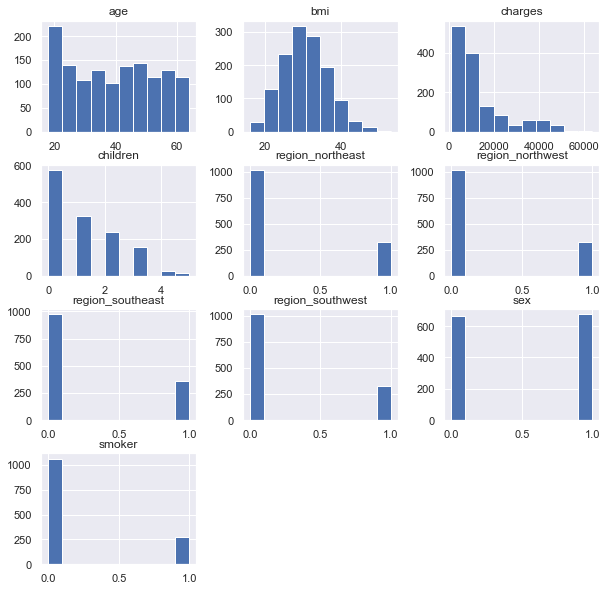

In [18]:
df_insurance.hist(figsize=(10,10))
plt.show()

There are no outliers detected.

Let's take a closer look at the distribution of age, bmi, children and charges. 

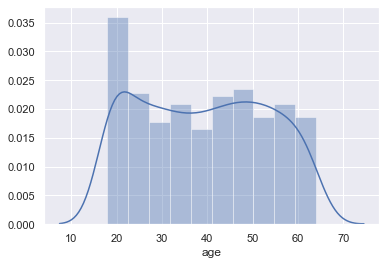

In [19]:
# Age

sns.distplot(df_insurance.age, bins= 10)

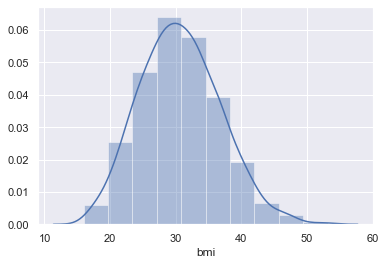

In [20]:
# BMI

sns.distplot(df_insurance.bmi, bins= 10)

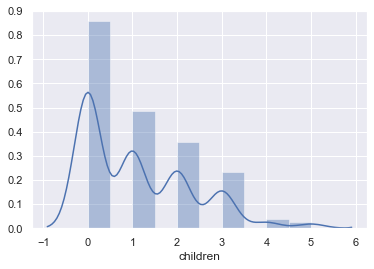

In [21]:
# Number of children

sns.distplot(df_insurance.children, bins= 10)

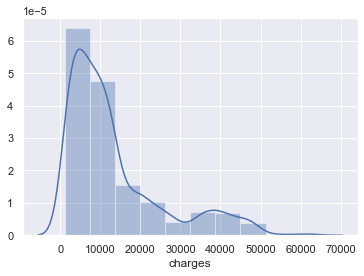

In [22]:
# Charges

sns.distplot(df_insurance.charges, bins= 10)

Based on the above, children and charges are right skewed whereas age and BMI are normally distributed. 
We may want to apply box-cox or log transformation in order to normalise the shape of the data, particularly when fitting a Linear Regression model. However, as this was not covered in this course, we will not be doing so. 

#### 3.6 Feature engineering

#### 3.6.1 Feature filtering

We will use Pearson's correlation in order to draw a heatmap and assess which variables are more correlated to the target variable in order to feed our model. 

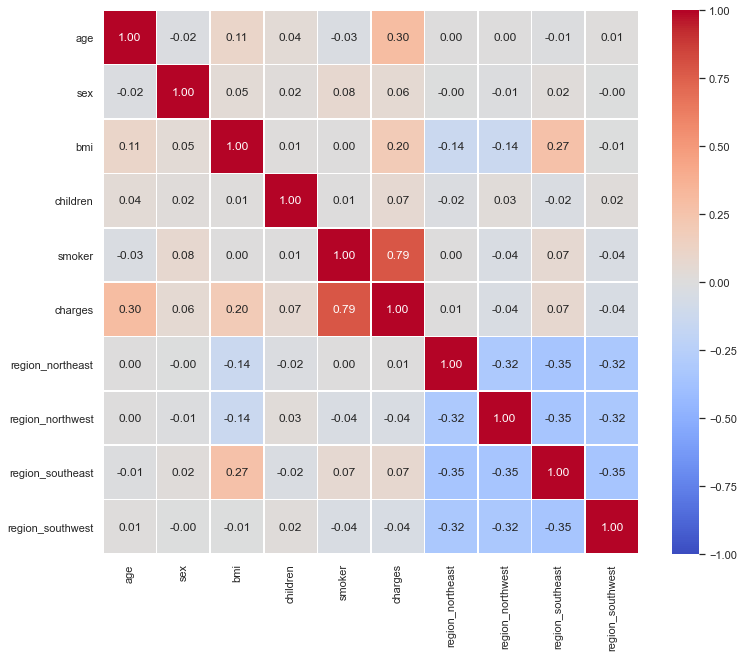

In [23]:
correlation_matrix = df_insurance.corr() 

plt.figure(figsize=(12,10))
sns.heatmap(data=correlation_matrix, annot = True, fmt='.2f', linewidths=.5, cmap = "coolwarm", vmin=-1, vmax=1)

Only the feature 'smoker' is highly correlated (i.e over the absolute value of 0.7) with charges, whereas the others are not. Since we do not have that many variable to begin with, all features will be used as we want to avoid underfitting the model. 

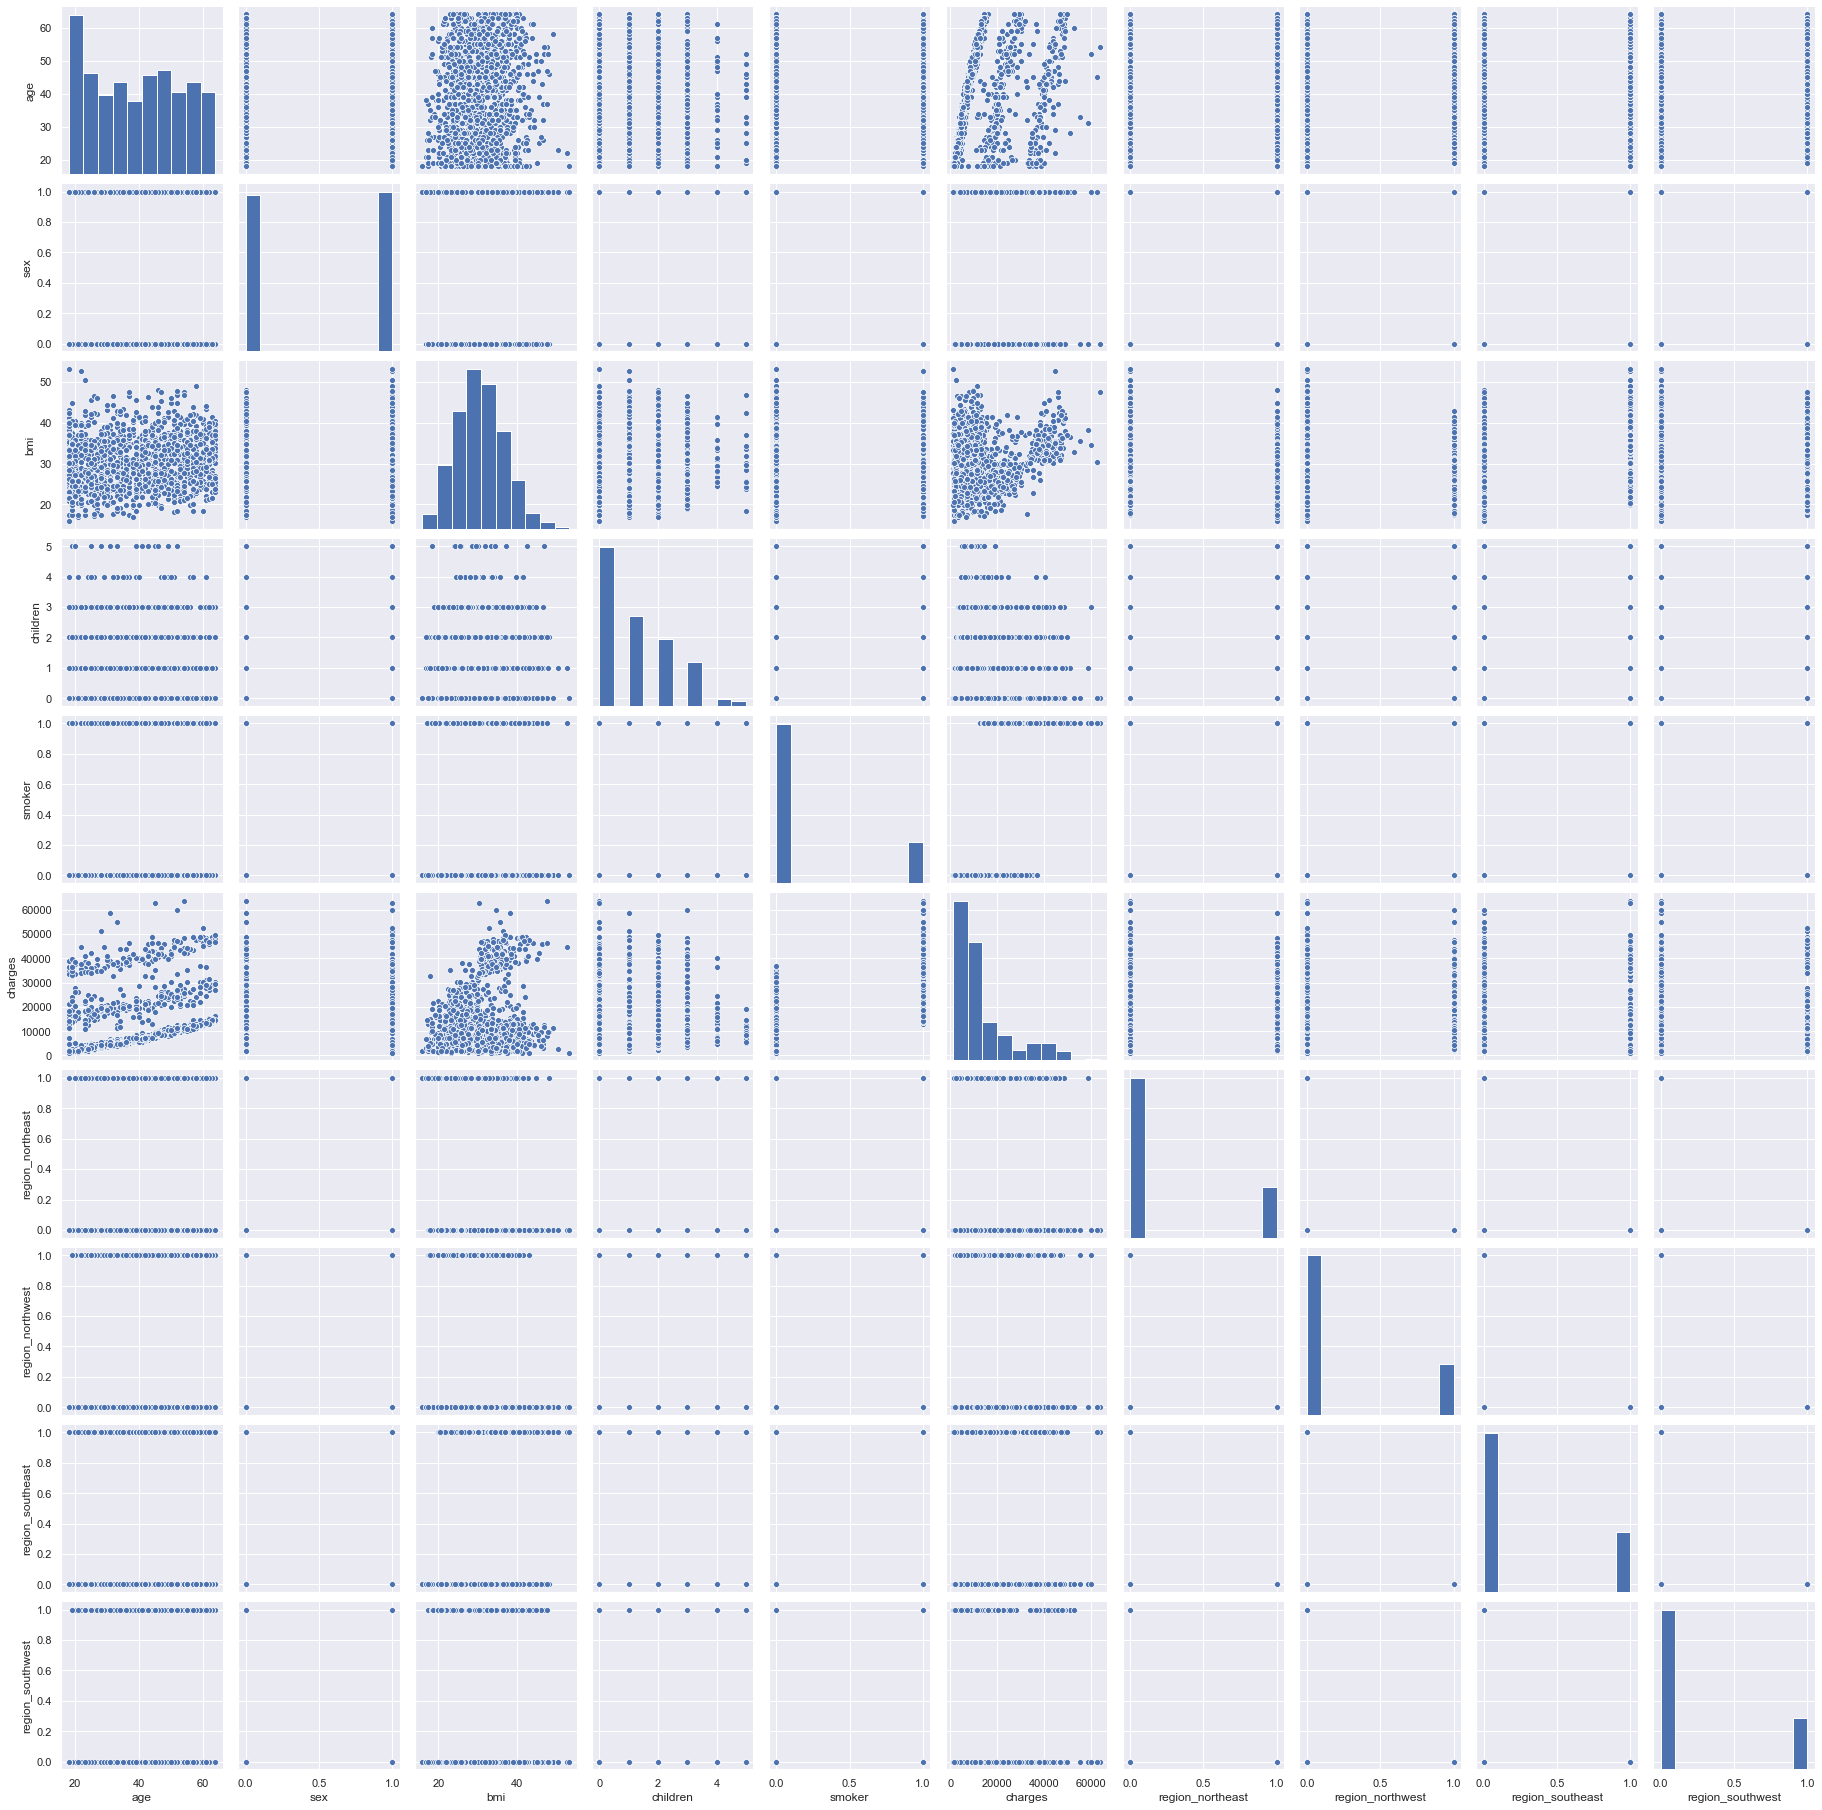

In [24]:
sns.pairplot(df_insurance)

Based on the above, majority of the variables have a non-linear relationship with the target variable, charges.
It is likely that the Linear Regression model may be underfitting as Linear Regression assumes a linear relationship between the independent and target variables. 

#### 3.6.2 Store the target and the features that will feed the models

In [25]:
# We will store all the features from the data into the variable X

X = pd.DataFrame(np.c_[df_insurance.age, df_insurance.sex, df_insurance.bmi, df_insurance.children, 
                      df_insurance.smoker, df_insurance.region_northeast, df_insurance.region_northwest,
                      df_insurance.region_southeast, df_insurance.region_southwest], columns=['age','sex', 'bmi', 'children', 
                      'smoker', 'northeast', 'northwest','southeast','southwest'])

X.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19.0,0.0,27.900,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,1.0,33.770,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,1.0,33.000,3.0,0.0,0.0,0.0,1.0,0.0
3,33.0,1.0,22.705,0.0,0.0,0.0,1.0,0.0,0.0
4,32.0,1.0,28.880,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
# The target column, charges, will be stored in y.

y = df_insurance.charges
#y = pd.DataFrame(df_diabetes.glucosa, columns = ['glucosa'])
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

# Step 4: Data Segregation

In this step, we will split the dataset into training and testing set.

The training set will be used to train the model and to tune the hyperparameters. 
The testing set will be used to evaluate the performance of the model. 

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
print('Training dataset: X_train=', X_train.shape, ', y_train', y_train.shape)
print('Testing dataset: X_test=', X_test.shape, ', y_test', y_test.shape)

Training dataset: X_train= (1002, 9) , y_train (1002,)
Testing dataset: X_test= (335, 9) , y_test (335,)


# Step 5: Model training

## 5.1 Establishing a Naive baseline

In [28]:
baseline = np.mean(y_train)

#Get an array with baseline with the size of the testing dataset 
y_predicted_naive = np.repeat(baseline, len(y_test))

# import the metric 
from sklearn.metrics import mean_squared_error

#y_test are the true values of y 
MSE_naive = mean_squared_error(y_test, y_predicted_naive)
RMSE_naive = np.sqrt(MSE_naive)

print('MSE:', MSE_naive)
print('RMSE:', RMSE_naive)

MSE: 173526859.57525164
RMSE: 13172.959408396111


## 5.2 Fitting the model

### 5.2.1 Normalisation 

Linear Regression uses gradient descent as an optimization technique thus requiring data to be scaled (Bhandari 2020). 

MinMaxScaler transforms the values of the variables to fall within the bounded intervals (min and max). 
StandardScaler transforms the values of the variables to fall around mean as 0 with standard deviation as 1. 

StandardScaler maintains useful information about outliers and makes our models less sensitive to them in contrast to min-max scaling, which scales the data to a limited range of values (between 0 and 1). 

Even though we do not have any outliers, we will opt with StandardScaler for this example. 

In [29]:
# Normalisation 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### 5.2.2 Feature extraction (dimensionality reduction) using Principal Component Analysis (PCA):

In [30]:
# Import PCA from sklearn.decomposition
from sklearn.decomposition import PCA 

# Import scale from sklearn.preprocessing
from sklearn.preprocessing import scale

# Scaling the values
X = scale(X)

# Defining the PCA estimator
pca = PCA(n_components = 9, whiten = True, random_state = 1)

# n_components parameter defines the number of components to keep
# 'whiten = True' parameter used to ensure only uncorrelated outputs
# We define a seed using 'random_state' parameter to ensure a reproducible result

In [31]:
# Fit with our data
pca.fit(X)

PCA(n_components=9, random_state=1, whiten=True)

In [32]:
# Cumulative variance explains
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
print(var1)

[ 17.44  32.29  46.98  59.05  70.8   81.41  91.67 100.   100.  ]


Text(0, 0.5, 'cumulative explained variance')

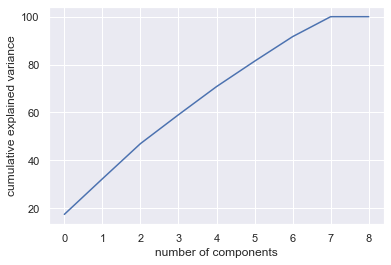

In [33]:
# Ascertaining the number of components for dimensionality reduction
plt.plot(var1)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

This plot shows that 7 components results in variance close to ~ 100%. Therefore, in this case, we’ll select number of components as 7.

### 5.2.1.1 Reduce the data to 7 dimensions

In [34]:
# 7 components 
pca = PCA(n_components=7,whiten = True, random_state = 1)

### 5.2.3 Linear Regression with normalisation 

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

lr = LinearRegression()

lr_model1 = make_pipeline(scaler, lr) # We build a model with StandardScaler and Linear Regression

# Fit/train the model
lr_model1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [36]:
# Checking the speed of the model
%time lr_model1.fit(X_train, y_train)

CPU times: user 8.95 ms, sys: 1.21 ms, total: 10.2 ms
Wall time: 7.21 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

#### 5.2.3.1 Evaluating the Linear Regression prior to applying PCA

In [37]:
#Prediction in the training dataset
y_lr_train_predict1 = lr_model1.predict(X_train)

# Prediction in the testing dataset 
y_lr_test_predict1 = lr_model1.predict(X_test) 

# Getting the RMSE scores
RMSE_training1 = np.sqrt(mean_squared_error(y_train, y_lr_train_predict1))

RMSE_test1 =np.sqrt(mean_squared_error(y_test, y_lr_test_predict1))

# Getting the R-squared scores
from sklearn.metrics import r2_score

R2_training1 = r2_score(y_train, y_lr_train_predict1)

R2_test1 = r2_score(y_test, y_lr_test_predict1)

# Getting the MSE scores
MSE_training1 = mean_squared_error(y_train, y_lr_train_predict1)
MSE_test1 = mean_squared_error(y_test, y_lr_test_predict1)

In [38]:
print('MSE score')
print('Training data:')
print('The model performance in training dataset is ', MSE_training1)
print()
print('MSE score')
print('Testing data:')
print('The model performance in testing dataset is ', MSE_test1)

MSE score
Training data:
The model performance in training dataset is  37182190.65699516

MSE score
Testing data:
The model performance in testing dataset is  35283922.77111071


In [39]:
print('Baseline:')
print('The naive RMSE baseline is ', RMSE_naive)
print()
print('RMSE score')
print('Training data:')
improvement_baseline1 = 100*abs(RMSE_training1 - RMSE_naive)/RMSE_naive
print('The model performance in training dataset (without PCA) is ', RMSE_training1)
print('It has an improvement over baseline of', round(improvement_baseline1, 2), '%.')
print()
print('RMSE score')
print('Testing data:')
improvement_baseline3 = 100*abs(RMSE_test1 - RMSE_naive)/RMSE_naive
print('The model performance in testing dataset (without PCA) is ', RMSE_test1)
print('It has an improvement over baseline of', round(improvement_baseline3, 2), '%.')
print()
print('R-squared score')
print('Training data:')
print('The model performance in training dataset (without PCA) is ', R2_training1)
print()
print('R-squared score')
print('Testing data:')
print('The model performance in testing dataset (without PCA) is ', R2_test1)

Baseline:
The naive RMSE baseline is  13172.959408396111

RMSE score
Training data:
The model performance in training dataset (without PCA) is  6097.720119601683
It has an improvement over baseline of 53.71 %.

RMSE score
Testing data:
The model performance in testing dataset (without PCA) is  5940.027169223278
It has an improvement over baseline of 54.91 %.

R-squared score
Training data:
The model performance in training dataset (without PCA) is  0.7297491098061568

R-squared score
Testing data:
The model performance in testing dataset (without PCA) is  0.7959403124253075


In [40]:
# Checking the speed of the model
%time lr_model1.fit(X_train, y_train)

CPU times: user 12 ms, sys: 1.63 ms, total: 13.6 ms
Wall time: 9.38 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

### 5.2.4 Linear Regression with normalisation and PCA

In [41]:
# Making a pipeline with normalisation and PCA
from sklearn.pipeline import make_pipeline

lr_model2 = make_pipeline(scaler, pca, lr) # We build a model with StandardScaler, PCA and LR
lr_model2

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=7, random_state=1, whiten=True)),
                ('linearregression', LinearRegression())])

In [42]:
# Fitting the model 
lr_model2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=7, random_state=1, whiten=True)),
                ('linearregression', LinearRegression())])

### 5.2.5 Checking the speed of the model

In [43]:
# Checking the speed of the model
%time lr_model2.fit(X_train, y_train)

CPU times: user 12.7 ms, sys: 1.64 ms, total: 14.3 ms
Wall time: 12.4 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=7, random_state=1, whiten=True)),
                ('linearregression', LinearRegression())])

## Step 6: Candidate Model Evaluation

#### Step 6.1 Evaluating the performance of Linear Regression with normalisation and PCA

In [44]:
#Prediction in the training dataset
y_lr_train_predict2 = lr_model2.predict(X_train)

# Prediction in the testing dataset 
y_lr_test_predict2 = lr_model2.predict(X_test) 

# Getting the RMSE scores
RMSE_training2 = np.sqrt(mean_squared_error(y_train, y_lr_train_predict2))
RMSE_test2 =np.sqrt(mean_squared_error(y_test, y_lr_test_predict2))

# Getting the R-squared scores
from sklearn.metrics import r2_score

R2_training2 = r2_score(y_train, y_lr_train_predict2)

R2_test2 = r2_score(y_test, y_lr_test_predict2)

# Getting the MSE scores
MSE_training2 = mean_squared_error(y_train, y_lr_train_predict2)
MSE_test2 = mean_squared_error(y_test, y_lr_test_predict2)

In [45]:
print('MSE score')
print('Training data:')
print('The model performance in training dataset is ', MSE_training2)
print()
print('MSE score')
print('Testing data:')
print('The model performance in testing dataset is ', MSE_test2)

MSE score
Training data:
The model performance in training dataset is  40593599.50261294

MSE score
Testing data:
The model performance in testing dataset is  40956185.964532405


In [46]:
print('Baseline:')
print('The naive RMSE baseline is ', RMSE_naive)
print()
print('RMSE score')
print('Training data:')
improvement_baseline2 = 100*abs(RMSE_training2 - RMSE_naive)/RMSE_naive
print('The model performance in training dataset is ', RMSE_training2)
print('It has an improvement over baseline of', round(improvement_baseline2, 2), '%.')
print()
print('RMSE score')
print('Testing data:')
improvement_baseline4 = 100*abs(RMSE_test2 - RMSE_naive)/RMSE_naive
print('The model performance in testing dataset is ', RMSE_test2)
print('It has an improvement over baseline of', round(improvement_baseline4, 2), '%.')
print()
print('R-squared score')
print('Training data:')
print('The model performance in training dataset is ', R2_training2)
print()
print('R-squared score')
print('Testing data:')
print('The model performance in testing dataset is ', R2_test2)

Baseline:
The naive RMSE baseline is  13172.959408396111

RMSE score
Training data:
The model performance in training dataset is  6371.310658146637
It has an improvement over baseline of 51.63 %.

RMSE score
Testing data:
The model performance in testing dataset is  6399.7020215422845
It has an improvement over baseline of 51.42 %.

R-squared score
Training data:
The model performance in training dataset is  0.7049540059929309

R-squared score
Testing data:
The model performance in testing dataset is  0.7631355627210381


In [47]:
models_performance_dict = []

baseline_performance = {
    'name': 'Naive_baseline',
    'model': baseline,
    'RMSE': RMSE_naive}
models_performance_dict.append(baseline_performance)

model1_performance = {
    'name': 'LR Model 1',
    'model': lr_model1,
    'RMSE': RMSE_test1}
models_performance_dict.append(model1_performance)

model2_performance = {
    'name': 'LR Model 2',
    'model': lr_model2,
    'RMSE': RMSE_test2}
models_performance_dict.append(model2_performance)

pd.DataFrame(models_performance_dict)

,name,model,RMSE
0,Naive_baseline,13082.3,13172.959408
1,LR Model 1,"(StandardScaler(), LinearRegression())",5940.027169
2,LR Model 2,"(StandardScaler(), PCA(n_components=7, random_...",6399.702022


Based on the above, the Linear Regression model actually performed better without PCA. Although LR is prone to overfitting, we do not have an issue of overfitting for our dataset since we do not have a lot of features/variables to begin with. By reducing the dimensionality of our features using PCA, our LR model is actually underfitting. 

#### 6.2 Plotting the predicted values against real values

Since the course requirement mandate that we apply PCA on one of our models, I have chosen to do so with the LR model. For this reason, I will plot the predicted values against real values for Model 2 (where PCA was applied). 

Text(0.5, 1.0, 'Comparison between predicted values using against real values using Linear Regression')

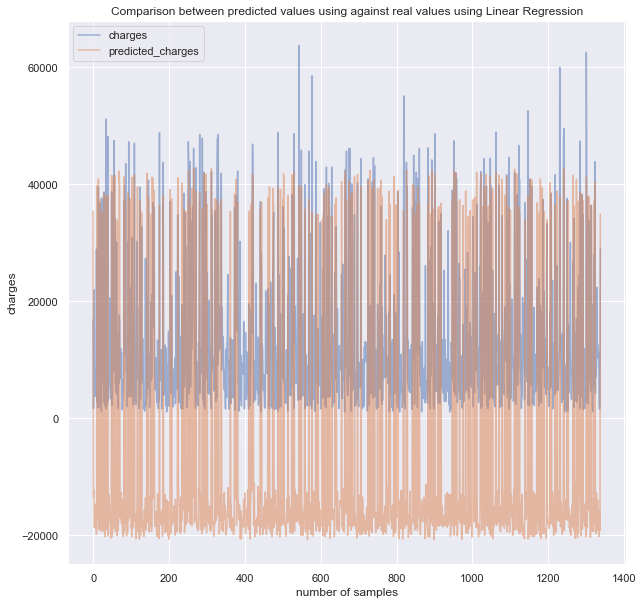

In [48]:
df_insurance['predicted_charges'] = lr_model2.predict(X)
df_insurance[['charges','predicted_charges']].plot(alpha = 0.5, figsize = (10,10))
plt.xlabel('number of samples')
plt.ylabel('charges')
plt.title('Comparison between predicted values using against real values using Linear Regression')

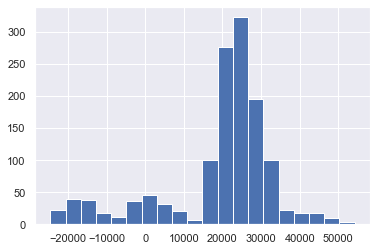

In [49]:
df_insurance['svr_residue'] = df_insurance['charges'] - df_insurance['predicted_charges']
df_insurance.svr_residue.hist(bins = 20)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Comparison between predicted values against real values using Linear Regression')

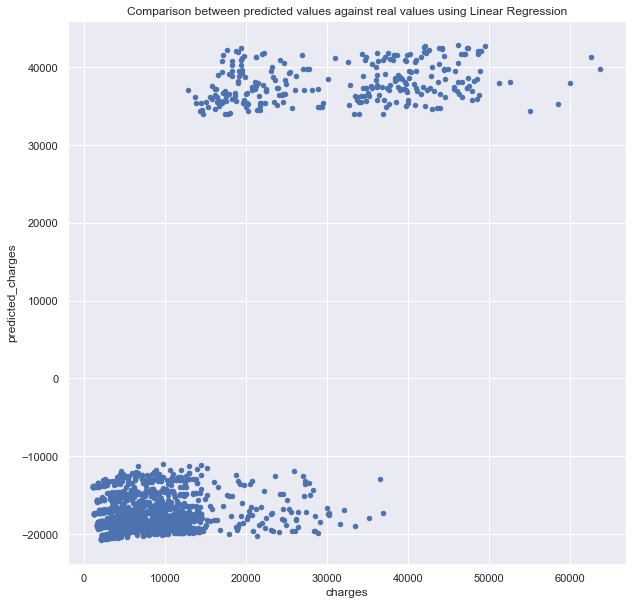

In [50]:
df_insurance.plot.scatter(x = 'charges', y = 'predicted_charges', figsize = (10,10))
plt.title('Comparison between predicted values against real values using Linear Regression')

For more information, please refer to the Results and Discussion section of the report. 

# References

Bhandari, A 2020, *Feature scaling for machine learning: understanding the difference between normalisation vs standardization*, Analytics Vidhya, viewed 15 February 2021, <https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/>

Choi, M 2018, *Medical cost personal datasets*, Kaggle, viewed 15 February 2021, <https://www.kaggle.com/mirichoi0218/insurance>  